# **TikTok Project**
**Course 4 - The Power of Statistics**

You are a data professional at TikTok. The current project is reaching its midpoint; a project proposal, Python coding work, and exploratory data analysis have all been completed.

The team has reviewed the results of the exploratory data analysis and the previous executive summary the team prepared. You received an email from Orion Rainier, Data Scientist at TikTok, with your next assignment: determine and conduct the necessary hypothesis tests and statistical analysis for the TikTok classification project.

A notebook was structured and prepared to help you in this project. Please complete the following questions.


# **Course 4 End-of-course project: Data exploration and hypothesis testing**

In this activity, you will explore the data provided and conduct hypothesis testing.
<br/>

**The purpose** of this project is to demostrate knowledge of how to prepare, create, and analyze hypothesis tests.

**The goal** is to apply descriptive and inferential statistics, probability distributions, and hypothesis testing in Python.
<br/>

*This activity has three parts:*

**Part 1:** Imports and data loading
* What data packages will be necessary for hypothesis testing?

**Part 2:** Conduct hypothesis testing
* How will descriptive statistics help you analyze your data?

* How will you formulate your null hypothesis and alternative hypothesis?

**Part 3:** Communicate insights with stakeholders

* What key business insight(s) emerge from your hypothesis test?

* What business recommendations do you propose based on your results?

<br/>

Follow the instructions and answer the questions below to complete the activity. Then, complete an executive summary using the questions listed on the PACE Strategy Document.

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work.



# **Data exploration and hypothesis testing**

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**

Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## **PACE: Plan**

Consider the questions in your PACE Strategy Document and those below to craft your response.

1. What is your research question for this data project? Later on, you will need to formulate the null and alternative hypotheses as the first step of your hypothesis test. Consider your research question now, at the start of this task.

Do videos from verified accounts and videos unverified accounts have different average view counts?


*Complete the following steps to perform statistical analysis of your data:*

### **Task 1. Imports and Data Loading**

Import packages and libraries needed to compute descriptive statistics and conduct a hypothesis test.

<details>
  <summary><h4><strong>Hint:</strong></h4></summary>

Be sure to import `pandas`, `numpy`, `matplotlib.pyplot`, `seaborn`, and `scipy`.

</details>

In [45]:
# Import packages for data manipulation
### YOUR CODE HERE ###
import numpy as np
import pandas as pd

# Import packages for data visualization
### YOUR CODE HERE ###
import matplotlib.pyplot as plt
import seaborn as sns

# Import packages for statistical analysis/hypothesis testing
from scipy import stats

Load the dataset.

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [99]:
# Load dataset into dataframe
data = pd.read_csv("../data/tiktok_dataset.csv")

data.dropna(inplace=True)
data.drop_duplicates(inplace=True)

<img src="images/Analyze.png" width="100" height="100" align=left>

<img src="images/Construct.png" width="100" height="100" align=left>

## **PACE: Analyze and Construct**

Consider the questions in your PACE Strategy Document and those below to craft your response:
1. Data professionals use descriptive statistics for Exploratory Data Analysis. How can computing descriptive statistics help you learn more about your data in this stage of your analysis?


==> ENTER YOUR RESPONSE HERE

### **Task 2. Data exploration**

Use descriptive statistics to conduct Exploratory Data Analysis (EDA).



<details>
  <summary><h4><strong>Hint:</strong></h4></summary>

Refer back to *Self Review Descriptive Statistics* for this step-by-step proccess.

</details>

Inspect the first five rows of the dataframe.

In [100]:
# Display first few rows
### YOUR CODE HERE ###


In [101]:
# Generate a table of descriptive statistics about the data
### YOUR CODE HERE ###


Check for and handle missing values.

In [102]:
# Check for missing values
### YOUR CODE HERE ###


In [103]:
# Drop rows with missing values

### YOUR CODE HERE ###


In [104]:
# Display first few rows after handling missing values

### YOUR CODE HERE ###


You are interested in the relationship between `verified_status` and `video_view_count`. One approach is to examine the mean value of `video_view_count` for each group of `verified_status` in the sample data.

In [105]:
# Compute the mean `video_view_count` for each group in `verified_status`
### YOUR CODE HERE ###
data.columns

Index(['#', 'claim_status', 'video_id', 'video_duration_sec',
       'video_transcription_text', 'verified_status', 'author_ban_status',
       'video_view_count', 'video_like_count', 'video_share_count',
       'video_download_count', 'video_comment_count'],
      dtype='object')

In [106]:
verified_users = data[data['verified_status'] == 'verified']
nonverified_users = data[data['verified_status'] != 'verified']

assert verified_users.shape[0] + nonverified_users.shape[0] == data.shape[0]

In [107]:
verified_users['video_view_count'].describe()

count      1200.000000
mean      91439.164167
std      221138.764926
min          37.000000
25%        2974.750000
50%        6023.500000
75%        9036.750000
max      997769.000000
Name: video_view_count, dtype: float64

In [108]:
nonverified_users['video_view_count'].describe()

count     17884.000000
mean     265663.785339
std      325681.881915
min          20.000000
25%        5160.000000
50%       46723.000000
75%      523099.500000
max      999817.000000
Name: video_view_count, dtype: float64

In [109]:
46 / 6


7.666666666666667

**Verified Users:**
- Mean: 91k +/- 221k
- Median: 6k
- Min Max: 37 - 1M

**Non-Verified Users:**
- Mean: 265k +/- 325k
- Median: 46k
- Min Max: 20 - 1M

---

We can see that non verified users have a mean value almost 3x bigger than the mean value of verified users.

Similarly, non verified median value is 7.6x bigger than verified users.

This fact suggest that non verified users receive more views than verified users on average. But is this difference statistically significant? Also, how the `author_ban_status` impact the view count? Does banned users have similar video view count regardless if they are from the verified or non-verified group? We'll answer those hypothesis below. But first, let's generate some plots to better understand the data.

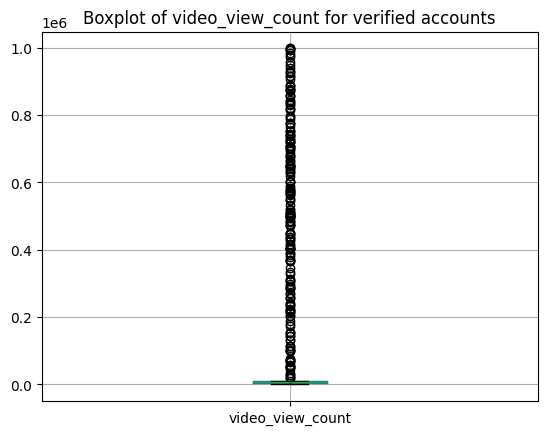

In [110]:
verified_users[['video_view_count', ]].boxplot()
plt.title('Boxplot of video_view_count for verified accounts')
plt.show()

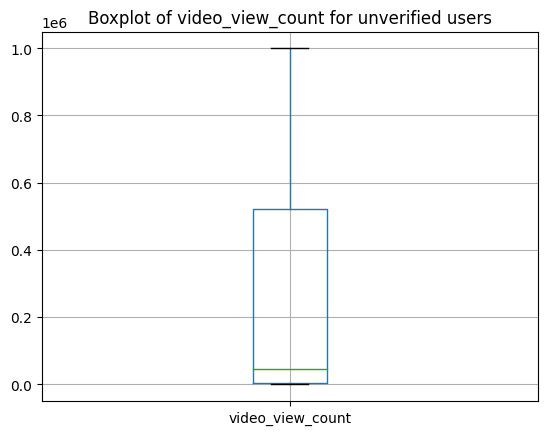

In [111]:
nonverified_users[['video_view_count', ]].boxplot()
plt.title("Boxplot of video_view_count for unverified users")
plt.show()

From the two plots above, we notice that there is a lot of outliers in the verified group compared to the non-verified group. This suggests 

From the two plots above, we notice that there is a lot of outliers in the verified group compared to the non-verified group. This suggests that it's much more common to have very popular videos from non-verified users than verified users.

### **Task 3. Hypothesis testing**

Before you conduct your hypothesis test, consider the following questions where applicable to complete your code response:

1. Recall the difference between the null hypothesis and the alternative hypotheses. What are your hypotheses for this data project?

**Hypothesis 1:** The mean view count between of non-verified users is bigger than the view count of verified users (two-sample test)

**Hypothesis 2:** There is no difference in the view count between banned non-verified users and banned verified users (two-sample test)

**Hypothesis 3:** There is no difference in the view count between under review non-verified users and under-review verified users (two-sample test)



Your goal in this step is to conduct a two-sample t-test. Recall the steps for conducting a hypothesis test:


1.   State the null hypothesis and the alternative hypothesis
2.   Choose a signficance level
3.   Find the p-value
4.   Reject or fail to reject the null hypothesis



**Null Hypothesis 1:** mean view count of verified users >= non-verified users
Alternative Hypothesis 1: mean view count of verified users <  non-verified users.

**Null Hypothesis 2:** there is no difference in the mean view count between verified and non-verified users
Alternative Hypothesis 2: there is difference in the mean view count between verified and non-verified users

**Null Hypothesis 3:** there is no difference in the mean view count between banned verified and banned non-verified users
Alternative Hypothesis 3: there is difference in the mean view count between banned verified and banned non-verified users

You choose 5% as the significance level and proceed with a two-sample t-test.

In [112]:
# Conduct a two-sample t-test to compare means
### YOUR CODE HERE ###
def perform_t_test(group1, group2, alternative='two-sided', equal_var=False):
    """Performs a two-sample t-test or Welch's t-test."""
    if len(group1) < 2 or len(group2) < 2:
        print("Warning: Sample size less than 2, cannot perform a t-test.")
        return None, None, None
    result = stats.ttest_ind(a=group1, b=group2, alternative=alternative, equal_var=equal_var)
    return result #Return the degrees of freedom

In [113]:
sample_verified = verified_users.sample(n=20, replace = True, random_state=13490)
sample_nonverified = nonverified_users.sample(n=20, replace = True, random_state=13490)

In [114]:
perform_t_test(
    sample_nonverified.video_view_count,
    sample_verified.video_view_count,
    alternative='greater'
)

Ttest_indResult(statistic=3.0860687412394086, pvalue=0.0022782549095016758)

**Question:** Based on the p-value you got above, do you reject or fail to reject the null hypothesis?


Based on the above test, 0.22% < 5%, so we reject the hypothesis 1. So the non-verified users indeed have a bigger view count.

In [128]:
sample_banned_verified = verified_users[verified_users['author_ban_status'] == 'banned'].sample(n=100, replace = True, random_state=13490)
sample_banned_nonverified = nonverified_users[nonverified_users['author_ban_status'] == 'banned'].sample(n=100, replace = True, random_state=13490)

In [129]:
print("Banned verified users mean view count: ", sample_banned_verified['video_view_count'].mean())
print("Banned nonverified users mean view count: ", sample_banned_nonverified['video_view_count'].mean())

Banned verified users mean view count:  242048.35
Banned nonverified users mean view count:  451889.85


In [125]:
perform_t_test(
    sample_nonverified.video_view_count,
    sample_verified.video_view_count,
    alternative='two-sided'
)

Ttest_indResult(statistic=3.0860687412394086, pvalue=0.0045565098190033515)

As we can see from the t-test above, the p-value is 0.4% < 5%, which implies that the view count beteween verified banned and non-verified banned users is statistically different.

In [135]:
# sample_banned_verified = verified_users[verified_users['author_ban_status'] == 'banned'].sample(n=20, replace = True, random_state=13490)
# sample_banned_nonverified = nonverified_users[nonverified_users['author_ban_status'] == 'banned'].sample(n=20, replace = True, random_state=13490)
sample_underreview_nonverified = nonverified_users[nonverified_users['author_ban_status'] == 'under review'].sample(n=100, replace = True, random_state=13490)
sample_underreview_verified = verified_users[verified_users['author_ban_status'] == 'under review'].sample(n=100, replace = True, random_state=13490)

In [136]:
print("Banned verified users mean view count: ", sample_underreview_verified['video_view_count'].mean())
print("Under review verified users mean view count: ", sample_underreview_nonverified['video_view_count'].mean())

Banned verified users mean view count:  208494.83
Under review verified users mean view count:  382619.23


In [137]:
perform_t_test(
    sample_underreview_verified.video_view_count,
    sample_underreview_nonverified.video_view_count,
    alternative='two-sided'
)

Ttest_indResult(statistic=-3.700174214779147, pvalue=0.0002829896975825059)

Similarlly as before, p-value is 0.028% < 5%, which implies that there is a statistically difference between the mean view count of under review verified and non-verified users. 

<img src="images/Execute.png" width="100" height="100" align=left>

## **PACE: Execute**

Consider the questions in your PACE Strategy Documentto reflect on the Execute stage.

## **Step 4: Communicate insights with stakeholders**

*Ask yourself the following questions:*

1. What business insight(s) can you draw from the result of your hypothesis test?

There is a strong statistical significance showing that verified users have a smaller view count on their videos when compared with non verified users.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.